# การกำหนดราคารถยนต์

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_selection import RFECV , RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV , RidgeCV , LinearRegression , ElasticNetCV , SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler , PolynomialFeatures , RobustScaler
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Understanding
### ชื่อ columns และความหมายของแต่ละ columns

In [4]:
car_dict = pd.read_csv('car_dict.csv')
car_dict

,Unnamed: 0,Car_ID,Unique id of each observation (Interger)
0,0,Symboling,"Its assigned insurance risk rating, A value of..."
1,1,carCompany,Name of car company (Categorical)
2,2,fueltype,Car fuel type i.e gas or diesel (Categorical)
3,3,aspiration,Aspiration used in a car (Categorical)
4,4,doornumber,Number of doors in a car (Categorical)
5,5,carbody,body of car (Categorical)
6,6,drivewheel,type of drive wheel (Categorical)
7,7,enginelocation,Location of car engine (Categorical)
8,8,wheelbase,Weelbase of car (Numeric)
9,9,carlength,Length of car (Numeric)


### ตรวจสอบคุณสมบัติ

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### ตรวจสอบ Missing Value

In [6]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### ตรวจสอบค่าต่างๆของแต่ละ columns ที่เป็นจำนวนนับ

In [7]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### เปลี่ยนชื่อรุ่นของรถ ให้เหลือแค่ชื่อยี่ห้อ

In [8]:
car['CarName'].sample(10)

91            nissan rogue
176         toyota corolla
171         toyota corolla
60      mazda glc custom l
191      volkswagen rabbit
43              isuzu MU-X
197              volvo 245
162         toyota mark ii
168         toyota corolla
22     dodge challenger se
Name: CarName, dtype: object

In [9]:
car['CarName'].map(lambda x : x.split(' ')[0])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [10]:
car['CarName'] = car['CarName'].map(lambda x : x.split(' ')[0])

### ตรวจสอบชื่อของแต่ละยี่ห้อ

In [11]:
car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### มีชื่อยี่ห้อที่คล้ายกัน เปลี่ยนชื่อให้เหมือนกัน

In [12]:
car['CarName'].replace('maxda' , 'mazda' , inplace=True)
car['CarName'].replace('Nissan' , 'nissan' , inplace=True)
car['CarName'].replace('porcshce' , 'porsche' , inplace=True)
car['CarName'].replace('toyouta' , 'toyota' , inplace=True)
car['CarName'].replace('vokswagen' , 'volkswagen' , inplace=True)
car['CarName'].replace('vw' , 'volkswagen' , inplace=True)

In [13]:
car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### ตรวจสอบค่าซ้ำ

In [14]:
car.duplicated().sum()

0

### ตรวจสอบประเภทของ columns : cat=Catagory , num=Numeric

In [15]:
cat = []
num = []

for i in car.columns:
    if car[i].dtype == 'object' :
        cat.append(i)
    else :
        num.append(i)

In [16]:
print('Catagory Columns : ',len(cat))
print(cat)

Catagory Columns :  10
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [17]:
print('Numeric Columns : ',len(num))
print(num)

Numeric Columns :  16
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [18]:
plt.style.use('ggplot')

## EDA

### ดูการกระจายตัวของราคารถ

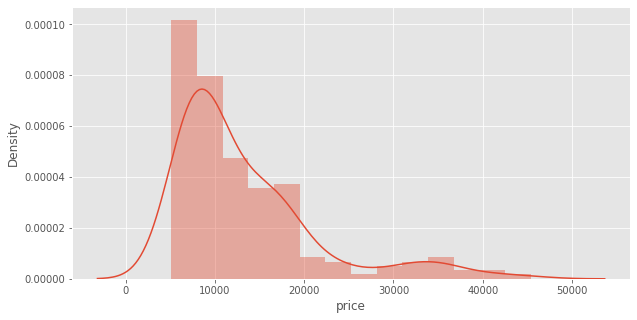

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(car.price);

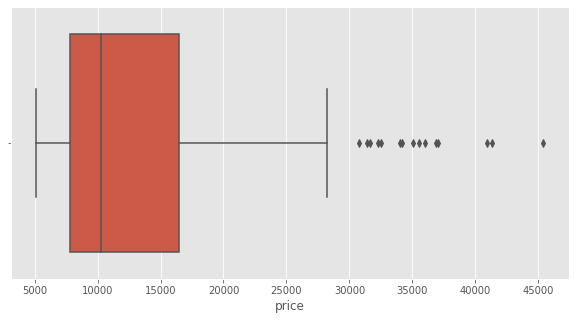

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(car.price);

In [21]:
q1 = car['price'].quantile(0.25)
q3 = car['price'].quantile(0.75)

In [22]:
print(q1)

7788.0


In [23]:
print(q3)

16503.0


### จำนวนรถแต่ละยี่ห้อ

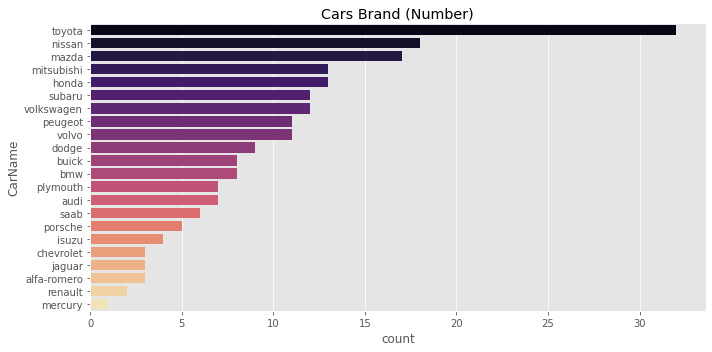

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y=car['CarName'] , order=car['CarName'].value_counts().sort_values(ascending=False).keys() , palette='magma')
plt.title('Cars Brand (Number)')
plt.tight_layout()

In [25]:
car_avg_price = car.groupby('CarName').mean()['price'].to_frame()

### ราคาเฉลี่ยของรถแต่ละยี่ห้อ

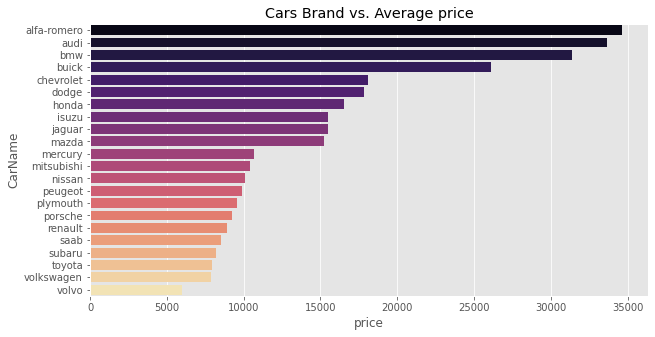

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data=car_avg_price.sort_values('price' , ascending=False) , y=car_avg_price.index , x='price',palette='magma')
plt.title('Cars Brand vs. Average price');

In [27]:
def bar_box(col):

    fig , ax = plt.subplots(1,2 , figsize=(10,4))
    sns.countplot(x=car[col] , ax=ax[0] , palette='magma_r')
    sns.boxplot(x=car[col] , y=car['price'] ,  palette='magma_r', ax=ax[1])
    plt.tight_layout()
    ax[0].set_title(f'{col} (Number))')
    ax[1].set_title(f'{col} vs. Price')


### จำนวนรถในแต่ละคุณสมบัติและเปรียบเทียบราคารถของแต่ละคุณสมบัติ

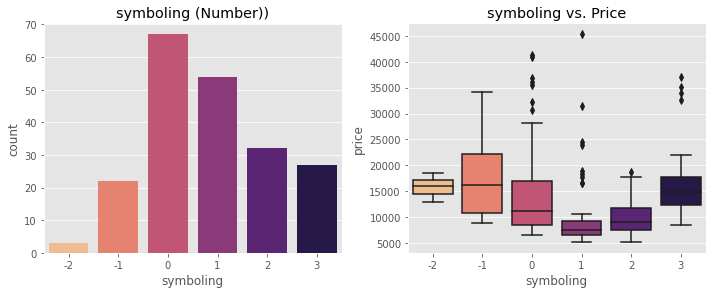

In [28]:
bar_box('symboling')

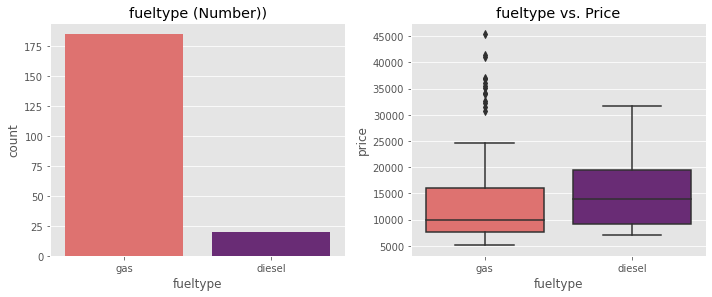

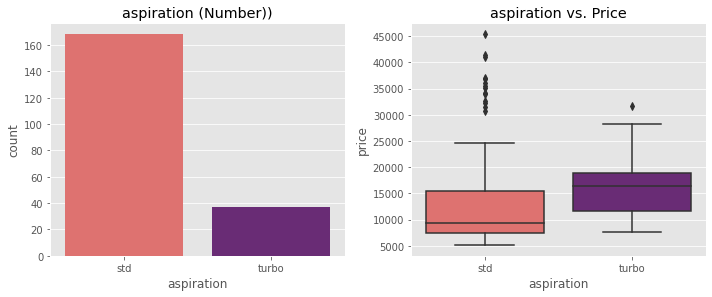

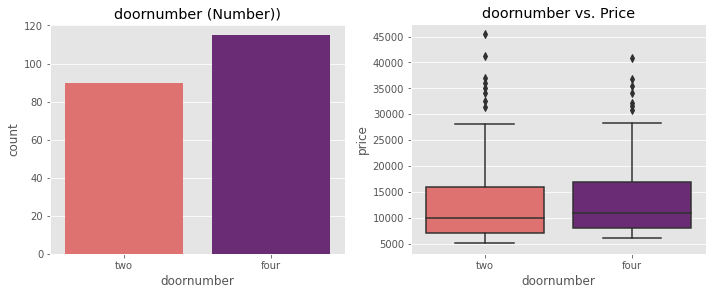

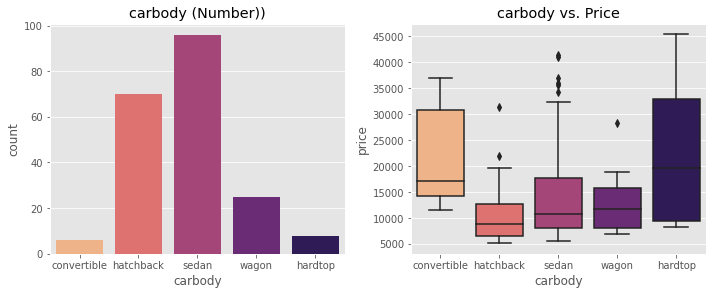

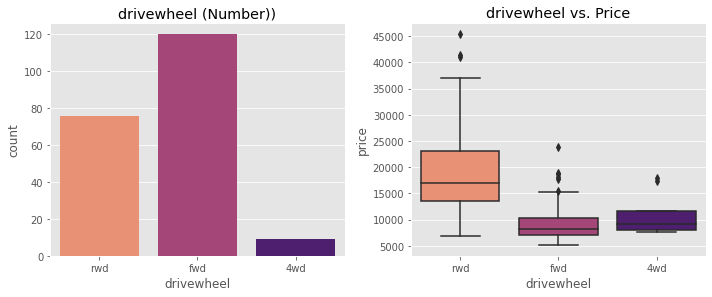

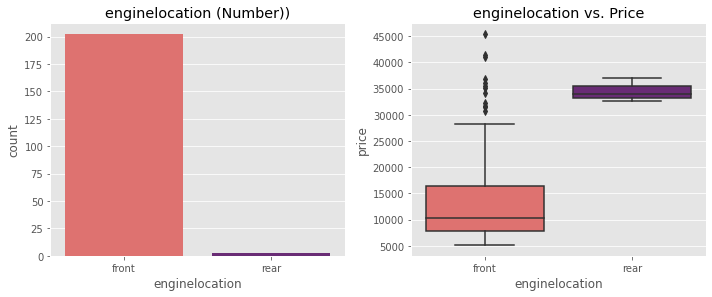

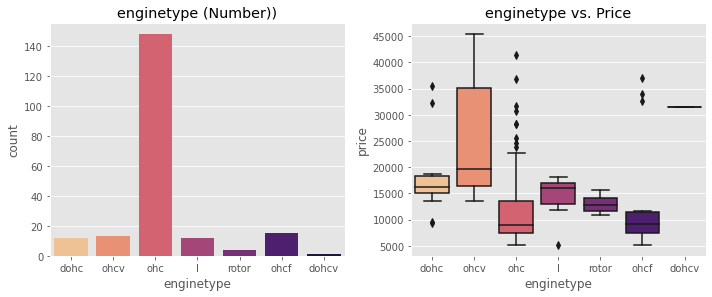

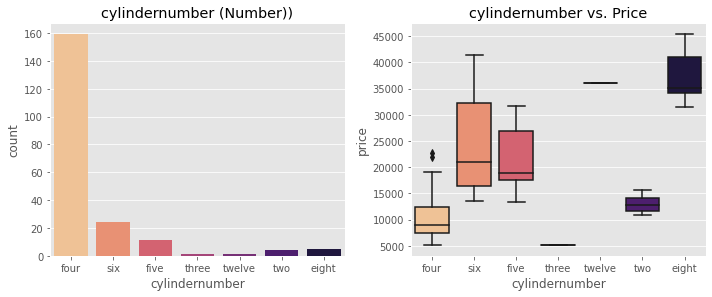

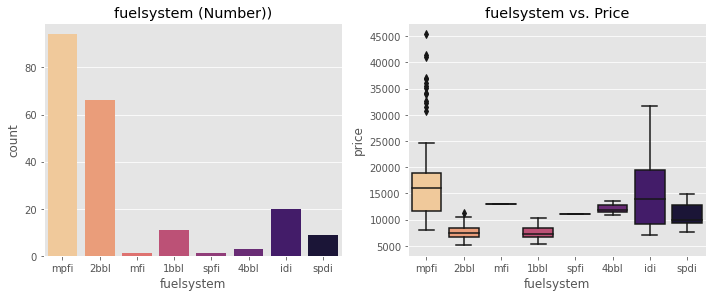

In [29]:
for i in cat :
    if i not in 'CarName':
        bar_box(i)

หลายคุณสมบัติแสดงให้เห็นจำนวนรถของคุณสมบัตินั้นๆ และ ช่วงของราคารถ เช่น คุณสมบัติ drivewheel(ระบบขับเคลื่อน) มีคุณสมบัติย่อยคือ rwd fwd 4wd และจาก boxplot แสดงให้เห็นว่า rwd มีราคาเฉลี่ยสูงกว่าระบบขับเคลื่อนอื่น

In [30]:
def scatt(col) :
    sns.lmplot(data=car , x=col , y='price')
    plt.title(f'{col} vs. price');

### ความสัมพันธ์ของแต่ละคุณสมบัติเมื่อเทียบกับราคารถ

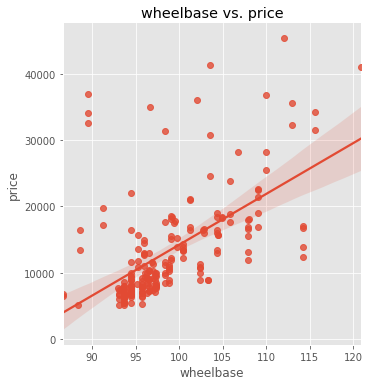

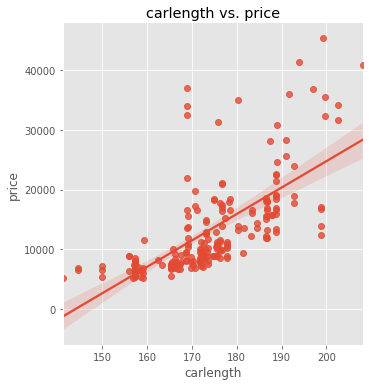

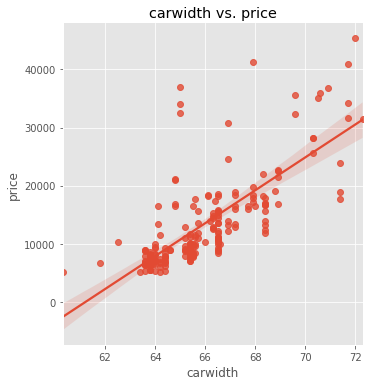

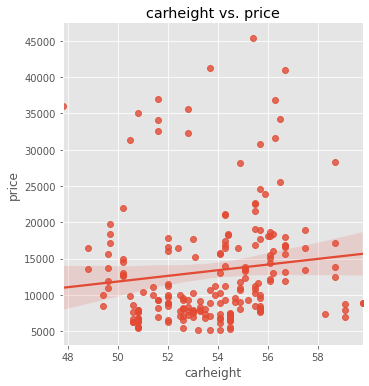

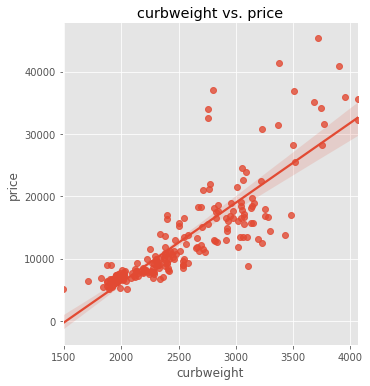

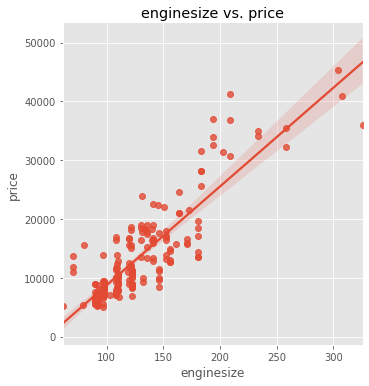

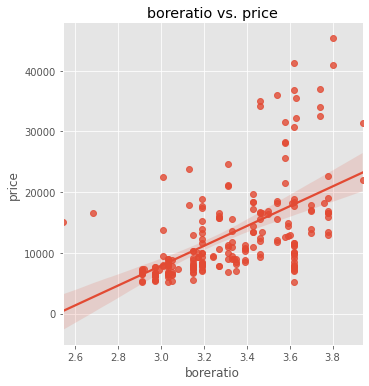

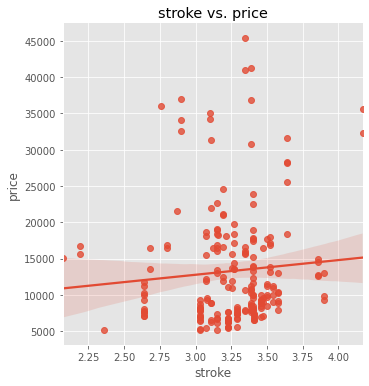

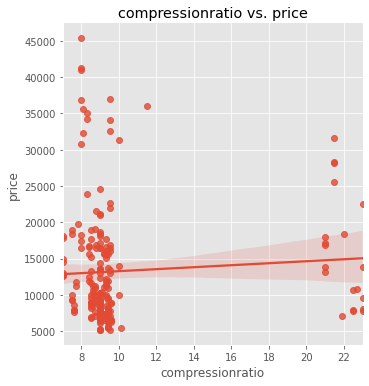

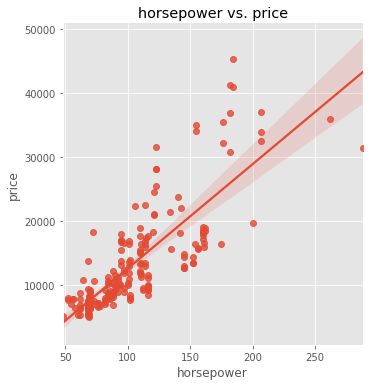

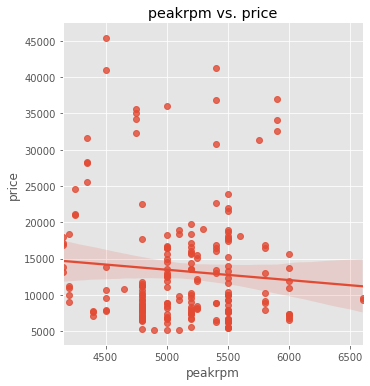

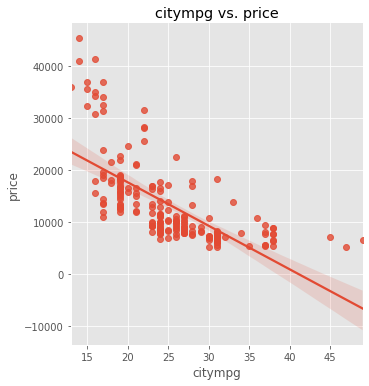

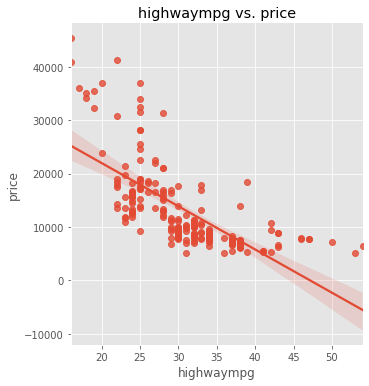

In [31]:
for i in num :
    if i not in ['car_ID','symboling' , 'price'] :
        scatt(i)

หลายคุณสมบัติแสดงให้เห็นว่ามีความสัมพันธ์กับราคารถ ในทางผันตรงและผกผัน แต่สำหรับคุณสมบัติ carhight stroke compressionratio peakrp ไม่มีความสัมพันธ์กับราคารถ

#### แสดงความสัมพันธ์ enginesize(ขนาดรถ) กับ ราคาของรถ ในระบบขับเคลื่อนที่ต่างกัน

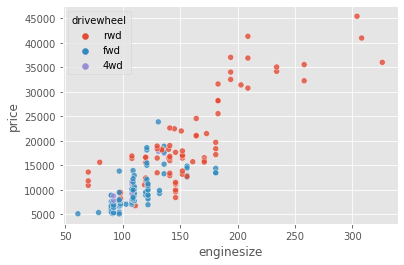

In [32]:
sns.scatterplot(data=car , x='enginesize' , y='price' , hue='drivewheel' , alpha=0.8);

#### แสดงความสัมพันธ์ citympg(จำนวนไมล์ต่อการใช้น้ำมัน1แกนลอน เมือขับในเมือง) กับ ราคาของรถ ในระบบขับเคลื่อนที่ต่างกัน

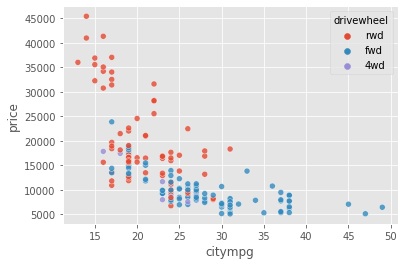

In [33]:
sns.scatterplot(data=car , x='citympg' , y='price' , hue='drivewheel' , alpha=0.8);

## Feature Engineering + Feature Selection

In [34]:
df = car.copy()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### ราคาเฉลี่ยของรถแต่ละยี่ห้อ

In [35]:
table = df.groupby('CarName').mean()['price'].reset_index()
table.head()

,CarName,price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000


In [36]:
df = df.merge(table , on='CarName' , how='left')

In [37]:
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y
67,68,-1,buick,diesel,turbo,four,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,33647.000000
156,157,0,toyota,gas,std,four,sedan,fwd,front,95.7,...,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0,9885.812500
183,184,2,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,mpfi,3.19,3.40,9.0,85,5250,27,34,7975.0,10077.500000
87,88,1,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,...,spdi,3.17,3.46,7.5,116,5500,23,30,9279.0,9239.769231
119,120,1,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,...,spdi,3.03,3.39,7.6,102,5500,24,30,7957.0,7963.428571
29,30,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0,7875.444444
41,42,0,honda,gas,std,four,sedan,fwd,front,96.5,...,mpfi,3.15,3.58,9.0,101,5800,24,28,12945.0,8184.692308
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.4,...,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,31400.500000
59,60,1,mazda,gas,std,two,hatchback,fwd,front,98.8,...,2bbl,3.39,3.39,8.6,84,4800,26,32,8845.0,10652.882353
15,16,0,bmw,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,26118.750000


### แบ่งระดับราคารถ

In [38]:
df['price_grade'] = pd.cut(df['price_y'] , [0,10000,20000,40000] , labels=['low' , 'medium','high'] )

In [39]:
df = df.drop('price_y' , axis=1).rename(columns={'price_x' : 'price'})
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_grade
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,medium


### แบ่ง feature และ target

In [40]:
feature = df.drop(['car_ID' , 'CarName' , 'price'] , axis=1)
target = df['price']

In [41]:
feature.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_grade
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,medium


In [42]:
feature = pd.concat([feature , feature['price_grade'].str.get_dummies()] , axis=1)
feature.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_grade,high,low,medium
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,medium,0,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,medium,0,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,medium,0,0,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,medium,0,0,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,medium,0,0,1


In [43]:
feature.drop('price_grade' , axis=1 , inplace=True)

### เปลี่ยน columns ประเภท catagory ให้เป็นตัวเลข

In [44]:
for i in feature.columns :
    if feature[i].dtype == 'object' :
        feature = pd.concat([feature , feature[i].str.get_dummies()] , axis=1)
        feature = feature.drop(i , axis=1)

In [45]:
feature.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'high', 'low',
       'medium', 'diesel', 'gas', 'std', 'turbo', 'four', 'two', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'front',
       'rear', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight',
       'five', 'four', 'six', 'three', 'twelve', 'two', '1bbl', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [46]:
feature.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
scaler = MinMaxScaler()

In [48]:
feature_scaling = feature.copy()

In [49]:
for i in feature.columns : 
    feature_scaling[i] = scaler.fit_transform(feature_scaling[[i]])

### ทำการ scale feature 

In [50]:
feature_scaling.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature Selection by RFECV หาจำนวนคุณสมบัติที่เหมาะสม

In [51]:
rfecv = RFECV(LinearRegression() , cv=5)

In [52]:
rfecv.fit(feature_scaling , target)

RFECV(cv=5, estimator=LinearRegression())

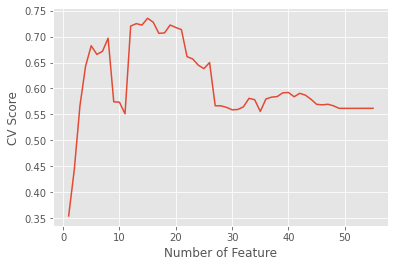

In [53]:
plt.plot(np.arange(1,len(feature.columns)+1) , rfecv.grid_scores_)
plt.xlabel('Number of Feature')
plt.ylabel('CV Score');

### จำนวนและชื่อ feature ที่เหมาะสม

In [54]:
rfecv.n_features_

15

In [55]:
feature_scaling.iloc[: , rfecv.support_].columns

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'high', 'convertible', 'front', 'rear', 'dohcv',
       'rotor', 'three', 'twelve'],
      dtype='object')

In [56]:
feature_select =  feature.iloc[: , rfecv.support_]

### แบ่งข้อมูลเป็น 2 ชุด ชุดฝึกและชุดทดสอบ

In [57]:
x_train , x_test , y_train , y_test = train_test_split(feature_select , target , test_size=0.2 
                                                       , random_state=50 , shuffle=True)

In [58]:
x_train.head()

,wheelbase,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,high,convertible,front,rear,dohcv,rotor,three,twelve
180,104.5,66.5,3131,171,3.27,3.35,156,0,0,1,0,0,0,0,0
38,96.5,65.2,2289,110,3.15,3.58,86,0,0,1,0,0,0,0,0
156,95.7,64.4,2081,98,3.19,3.03,70,0,0,1,0,0,0,0,0
40,96.5,62.5,2372,110,3.15,3.58,86,0,0,1,0,0,0,0,0
195,104.3,67.2,3034,141,3.78,3.15,114,0,0,1,0,0,0,0,0


In [59]:
print('จำนวนชุดฝึก = ',len(x_train))

จำนวนชุดฝึก =  164


In [60]:
print('จำนวนชุดทดสอบ = ',len(x_test))

จำนวนชุดทดสอบ =  41


## Modeling

#### ใช้ Algorithm 3 แบบ คือ LassoCV RidgeCV ElasticNetCV ฝึกและทดสอบเพื่อวัดผล 

In [61]:
lis_eval = []

def model(poly_degree , algor , algor_name):
    pipe = Pipeline([('poly',PolynomialFeatures(degree=poly_degree)) ,('scale' ,MinMaxScaler()), ('algor',algor)])    
    pipe.fit(x_train , y_train)
    y_pred = pipe.predict(x_test)
    print('Degree = ',poly_degree)
    print('Best Alpha = ',algor.alpha_)
    lis_eval.append([algor_name,
                     poly_degree,
                     algor.alpha_,
                     r2_score(y_test , y_pred).round(3),
                      mean_absolute_error(y_test , y_pred).round(2),
                      mean_squared_error(y_test , y_pred).round(2),
                      np.sqrt(mean_squared_error(y_test , y_pred)).round(2)])

In [62]:
model(1 , LassoCV(cv=5 , alphas=[0.001,0.01,0.1,1,10,100,1000]) , 'LassoCV')

Degree =  1
Best Alpha =  1.0


In [63]:
model(1 , RidgeCV(cv=5, alphas=[0.001,0.01,0.1,1,10,100,1000]) , 'RidgeCV')

Degree =  1
Best Alpha =  1.0


In [64]:
model(1 , ElasticNetCV(cv=5, alphas=[0.001,0.01,0.1,1,10,100,1000]) ,'ElasticNetCV')

Degree =  1
Best Alpha =  0.01


In [65]:
model(2 , LassoCV(cv=5 , alphas=[0.001,0.01,0.1,1,10,100,1000]) ,'LassoCV')

Degree =  2
Best Alpha =  10.0


In [66]:
model(2 , RidgeCV(cv=5, alphas=[0.001,0.01,0.1,1,10,100,1000]) ,'RidgeCV')

Degree =  2
Best Alpha =  10.0


In [67]:
model(2 , ElasticNetCV(cv=5, alphas=[0.001,0.01,0.1,1,10,100,1000]) ,'ElasticNetCV')

Degree =  2
Best Alpha =  0.1


In [68]:
result = pd.DataFrame(lis_eval , columns=['Model','Degree','Best_Alpha','R2' , 'MAE' , 'MSE' , 'RMSE'])

## Model Evaluation

#### ผลลัพธ์

In [69]:
result.sort_values('R2' , ascending=False)

,Model,Degree,Best_Alpha,R2,MAE,MSE,RMSE
3,LassoCV,2,10.00,0.954,1170.59,2122646.47,1456.93
0,LassoCV,1,1.00,0.944,1252.97,2569738.60,1603.04
2,ElasticNetCV,1,0.01,0.940,1266.49,2766616.89,1663.32
1,RidgeCV,1,1.00,0.938,1279.08,2855353.16,1689.78
5,ElasticNetCV,2,0.10,0.930,1315.37,3246057.44,1801.68
4,RidgeCV,2,10.00,0.926,1350.88,3409762.76,1846.55


### จากการประเมินผล ผลลัพธ์ที่ดีที่สุดคือ : โมเดล LassoCV ค่า Degree Polynomial=2